In [1]:
import sys
DIR_ROOT = '../../'
sys.path.append(DIR_ROOT)
from src.noise import *
import pandas as pd

# Seleciona o dataset
DATASET_NAME = 'mnist_784'
df = pd.read_csv(f'{DIR_ROOT}data/{DATASET_NAME}_train.csv')

# Copia os dados originais e separa
X_train = df.drop(columns=['target'])
y_train = df['target'].to_frame()

In [2]:
# Aplica data noise de acordo com o tipo de dataset e mostra um df das diferenças. Caso padrão, p = 10%

# colunas_normalizadas = normalize_cols(X_train.columns.tolist())
# X_train.columns = colunas_normalizadas

# colunas_categoricas = ['Marital Status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# colunas_categoricas = normalize_cols(colunas_categoricas)

# colunas_numericas = X_train.columns.difference(colunas_categoricas).tolist()

# X_train_noisy = data_noise_tabular(X_train, y_train, numerical_columns=colunas_numericas, categorical_columns=colunas_categoricas)

X_train_noisy = data_noise_images(X_train, y_train, DATASET_NAME)

df_compara_data = X_train - X_train_noisy
df_compara_data = df_compara_data[(df_compara_data != 0).any(axis=1)]
df_compara_data

# X_train_noisy = data_noise_text(X_train, y_train, col_name='review')
# df['review_noisy'] = X_train_noisy['review']
# df_compara_data = df[df['review'] != df['review_noisy']]
# df_compara_data[['review', 'review_noisy']]
# df_compara_data


=== AUDITORIA: data_noise_images (salt & pepper) ===
Dataset: mnist_784, p: 0.1, random_state: 42
Nº de colunas (pixels) totais: 784, nº de colunas ruidosas por instância: 79
Instâncias alteradas por classe:
  - 6: 516
  - 1: 591
  - 0: 518
  - 5: 474
  - 8: 512
  - 2: 525
  - 9: 522
  - 3: 536
  - 4: 512
  - 7: 547
Proporção salt/pepper por instância: 50/50 (extra para 'salt' quando ímpar)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4,0,0,0,-255,0,-255,0,0,0,0,...,0,0,-255,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,-255,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,-255,0,...,0,0,0,0,0,0,0,-255,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52462,0,0,0,0,0,0,0,0,0,0,...,0,0,-255,0,0,0,0,0,0,0
52467,0,0,0,0,0,0,0,0,-255,0,...,0,0,0,0,0,0,0,0,-255,0


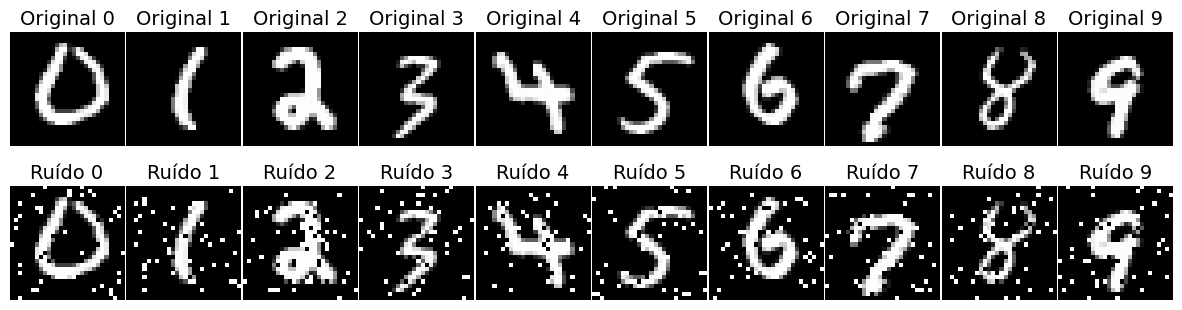

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usar as amostras que realmente têm diferenças (ruído aplicado)
indices_com_ruido = df_compara_data.index.tolist()

n_classes = 10
samples_to_show = min(10, len(indices_com_ruido))  # Mostrar até 10 amostras ou quantas tiver

# Pegar uma amostra de cada classe que tenha ruído aplicado, ordenando as classes de 0 a 9
samples_por_classe = {}
for idx in indices_com_ruido:
    classe = y_train.iloc[idx]['target']
    if classe not in samples_por_classe:
        samples_por_classe[classe] = idx
    if len(samples_por_classe) == n_classes:
        break

# Ordenar o dicionário pelas classes (chaves)
samples_por_classe = dict(sorted(samples_por_classe.items(), key=lambda x: x[0]))

n_samples = len(samples_por_classe)

# Apenas a figura simples: original vs ruído
fig, axes = plt.subplots(
    2, n_samples, figsize=(15, 4),
    gridspec_kw={'hspace': 0.0, 'wspace': 0.02},
    sharex=True, sharey=True
)

for i, (classe, sample_idx) in enumerate(samples_por_classe.items()):
    original_data = X_train.iloc[sample_idx].values.reshape(28, 28)
    axes[0, i].imshow(original_data, cmap='gray')
    axes[0, i].set_title(f'Original {classe}', pad=5, fontsize=14)  #aumentar tamanho do título
    axes[0, i].axis('off')

    noisy_data = X_train_noisy.iloc[sample_idx].values.reshape(28, 28)
    axes[1, i].imshow(noisy_data, cmap='gray')
    axes[1, i].set_title(f'Ruído {classe}', pad=5, fontsize=14)  #aumentar tamanho do título
    axes[1, i].axis('off')

plt.show()


In [3]:
# Gera o novo df com a combinação dos ruídos e salva na pasta certa.
df_noise = X_train_noisy.copy()
df_noise['target'] = y_train

df_noise.to_csv(f'{DIR_ROOT}data/noise/feature/{DATASET_NAME}_train.csv', index=False)

# Mantém os dados de teste intactos e copia para a pasta nova
df_test = pd.read_csv(f'{DIR_ROOT}data/{DATASET_NAME}_test.csv')
df_test.to_csv(f'{DIR_ROOT}data/noise/feature/{DATASET_NAME}_test.csv', index=True)